# Cognitive Neuroscience: Group Project

## Worksheet 2 - working with example EEG data

Marijn van Wingerden, Department of Cognitive Science and Artificial Intelligence – Tilburg University Academic Year 2021-2022

Welcome to Worksheet 2! In this worksheet, you are going to become familiar with the structure of an EEG sample dataset. In this lab, we will be exploring the basic data structure of an EEG datafile we will be using. These datafiles are (for now) presented in the EEGlab format. The lines below indicate how to load such a datafile. 

We need to use the SciPy library to import the raw datafiles that are stored in MATLAB (.mat) format. You can find the datafile in the Canvas module as well

In [1]:
try:
    import scipy
    print('scipy already installed')
except ImportError as e:
    !pip install scipy

scipy already installed


We will also import the usual packages. Please note that you can toggle 
%matplotlib notebook
to enable interactive plots in your Jupyter Notebooks

In [2]:
# %matplotlib notebook
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt


EEG = spio.loadmat(file_name = 'sampleEEGdata.mat')
print("Type of EEG is: ", type(EEG))

Type of EEG is:  <class 'dict'>


As you can see, EEG is a dictionary class variable. You can access the data stored in EEG through the get() method. To show the dictionary keys that are available, we can use the keys() method.

In [3]:
EEG.keys()

dict_keys(['__header__', '__version__', '__globals__', 'channames', 'data', 'nbchan', 'srate', 'times', 'trials'])

Assuming that we would want to access the data under the "data" key, we can use EEG.get("data"). We can use shape to get a look at the dimensions of our data

In [4]:
data = EEG.get("data")
data.shape

(64, 640, 99)

Observe that the shape of data reflects the EEGlab way of storing EEG data: nChan x nTime x nTrial
This means:
- nChan: the number of channels in the dataset
- nTime: the number of timepoints for each channel
- nTrial: the number of repetitions (trials) for each recording. 
In this case, there were 99 trials, and we have a recording of nChannels x nTimepoints for each of those trials.

Now, we want to compute the ERP of each channel. Remember that the ERP is the average signal across all trials at each time point. We know that the shape of data has the trials as its third dimension. You can verify this by extracting the "trials" information from the EEG dictionary. Use the method from the previous cell to save the nmber of trials as a *scalar* named "nTrials). The actual value is stored in a nested array, so make sure you extract the right number (the number of trials) digging down in the array, paying attention to the number of brackets in your answer and using type(). nTrials should be an numpy.uint8 variable.

In [5]:
EEG.get("trials")[0][0]

99

In [6]:
##
## your code here
##

nTrials = EEG.get("trials")[0][0]
type(nTrials)

numpy.uint8

Now, calculate the ERP by taking the mean of the numpy matrix along the "trial" dimension and save as "erp". Check the shape of erp to confirm the reduction of dimensionality. What are the remaining dimensions representing?

In [7]:
# reminder: EEG is nChan x nTime x nTrial

##
## your code here
##

erp = np.nanmean(data,axis = 2); 
erp.shape

(64, 640)

In order to plot the ERP, we need a time axis. Extract 'times' from the EEG dictionary and save to 'time'. This should be an numpy (1D) array for now. Check the shape of the new 'times' variable

In [8]:
##
## your code here
##

time = EEG.get("times")[0]
type(time)
time.shape

(640,)

Now we can make a basic plot of all channels vs. time. Compare the shapes of *time* and *erp* to figure out how to plot the lines corresponding to each channel all at once, using plot(). Matplotlib can plot a number of lines from a matrix Y against a single x (in this case, multiple ERPs). In order for this to work, the number of elements in x needs to match the number of elements in the first dimension of Y. If you would just plot (time, erp), the following error is produced:

    - ValueError: x and y must have same first dimension, but have shapes (640,) and (64, 640)
 
So, in order to print properly, we need to put the erp matrix "on its side". This is done with np.transpose. Implement this step and plot the transposed erp matrix against time.

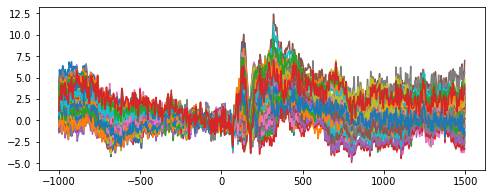

In [9]:
##
## your code here
##


fig, ax = plt.subplots(figsize=(8,3))
ax.plot(time, np.transpose(erp))
plt.show()

We can observe that time on x-axis goes from -1000 to 1500. What would the unit of measurement be here? We can figure it out by dividing the number of samples (where can you find the number of samples?) by the sampling rate. Save this value as total_time and print it by using:

print("The total time in this data segment is:", total_time, "seconds")

In [10]:
##
## your code here
##

nSamples = erp.shape[1]
srate = EEG.get("srate")[0][0]
total_time = nSamples/srate
print("The total time in this data segment is:", total_time, "seconds")

The total time in this data segment is: 2.5 seconds


Now we can add it to our plot, and update the plot. We might as well add a title to the figure as well. Go ahead and add an xlabel and title to your plot. The reference for matplotlib is here: https://matplotlib.org. If you want to re-draw the updated plot, just call the plot object again (fig).

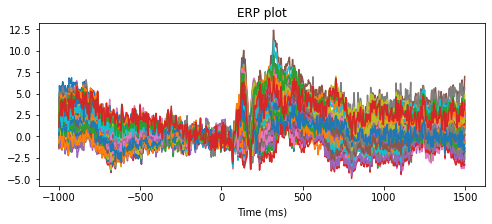

In [11]:
##
## your code here
##

ax.set_xlabel("Time (ms)")
ax.set_title("ERP plot")

fig

All of these lines represent the different channels (also called leads) in the EEG "montage". They have specific labels that are similar for the same montages (i.e. the 10/20 system: https://en.wikipedia.org/wiki/10–20_system_%28EEG%29). The labels for the channels are available in the EEG dictionary of course. Extract them from the dictionary under the key "channames". Again, dig down into the numpy array until you are at the level that corresponds to the number of channels.

In [12]:
##
## your code here
##

channames = EEG.get("channames")[0]
channames.shape

(64,)

It will be useful to include a legend for our plot, so that we know which channels correspond to which lines. Careful! If you use the default legend settings, the legend will extend vertically and explode the figure. So, rather, we would like to specify some parameters for legend(). Experiment with:
- ncol = ....
- bbox_to_anchor = (..,..)
- loc = "..."
to find a way to nicely display the legend next to the plot box

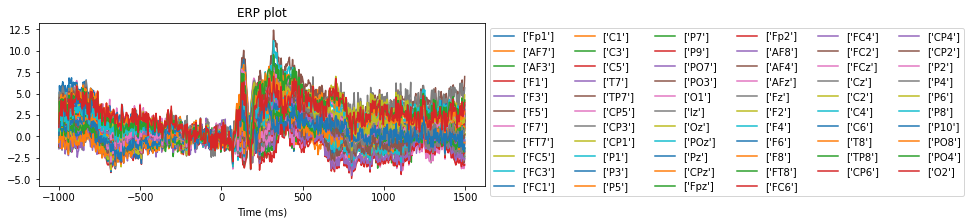

In [13]:
##
## your code here
##

ax.legend(channames, ncol = 6, bbox_to_anchor=(1,1), loc="upper left")
fig

## Final Exercise

Now, to put it all together, you will a new plot that zooms in to one channel. Based on the first letter of your first and last name, pick a channel. 
- If your last name start with an A:M, start with channels 1:32. 
- If your last name start with an N:Z, start with channels 33:64. 
- In your channel set, choose the channel that corresponds to the index of the first  letter of your first name in the alphabet. So, in my case that's the M, the 13th letter. My last name starts with a W, so I'm picking 13+32= channel 43 (Python index 42 - :D )
- extract the data for your chosen channel from the 3D data object as mydata. mydata should have dimensions nTrials x nSamples

With your channel data, make a new graph that plots:
- A line for each trial in mydata, all in the same color. You can pick the color, but set the alpha (transparency) to 0.5
- The ERP (= average over trials) for your channel. Pick any color, but implement a linewidth of at least 3

To complete the aesthetics, restrict the plot to an interesting time interval, from -500ms to +1000ms
- use ax.set_xlim to update the plot (or redraw the plot with a sub-index of time and erp)
- similarly change the limits on the y-axis to zoom in a little on the range of the ERP
- add an x-axis label
- add a title to the plot that includes the channel name
- add a legend that says "ERP" for just the ERP line, and shows no legend for the other (trial) lines

the shape of mydata is: (640, 99)


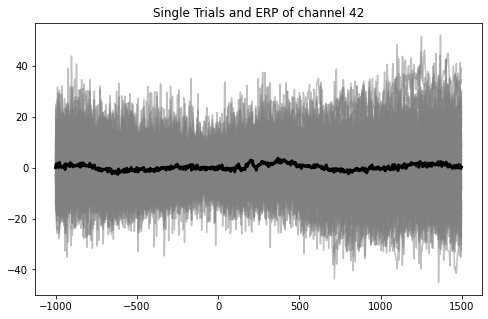

In [14]:
##
## your code here
##

mydata = data[42,:,:]
print("the shape of mydata is:",mydata.shape)

fig, ax = plt.subplots(figsize=(8,5))
plt.title("Single Trials and ERP of channel 42")
ax.plot(time, mydata, 'grey', alpha = 0.5)
ax.plot(time, erp[42,:], 'k', linewidth=3, label = 'ERP')
plt.show()

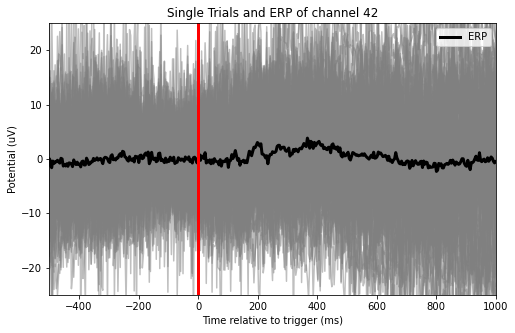

In [16]:
ax.set_xlim([-500,1000])
ax.set_ylim([-25,25])
ax.plot([0,0],[-25,25], 'r', linewidth = 3)
ax.set_xlabel("Time relative to trigger (ms)")
ax.set_ylabel("Potential (uV)")
ax.legend(bbox_to_anchor=(1,1), loc="upper right")
fig